In [7]:
import os
import json
import re
from PIL import Image
from PIL.ExifTags import TAGS
from matplotlib.pyplot import imshow
import numpy as np

print(Image.__version__)
print(type(TAGS))

5.3.0
<class 'dict'>


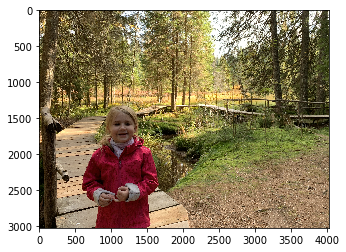

In [2]:
% matplotlib inline
#imgPfn = '/Users/michaelbach/Documents/GitHub/app1/_testing/post/data/2018-10-28T00-46-58.673596_81476742-3323-42d9-8e9c-8df3cd37af2c/2018-10-28T00-46-58.673596_81476742-3323-42d9-8e9c-8df3cd37af2c.jpg'
imgPfn = '/Users/michaelbach/Dropbox (Personal)/Camera Uploads/2018-10-07 15.26.08.jpg'
#imgPfn = '/Users/michaelbach/Dropbox (Personal)/Camera Uploads/2018-10-27 12.38.07.jpg'
img = Image.open(imgPfn)
imshow(np.asarray(img))

## Test caas.exif

In [45]:
import importlib
import caas.exif
importlib.reload(caas.exif)

exif_dict = caas.exif.getCameraPropertiesAsDict(imgPfn)
print(exif_dict)

print('***')

exif_dict = caas.exif.getLocationAsDict(imgPfn)
print(exif_dict)

{'ColorSpace': 65535, 'Flash': 16, 'LightSource': 'undefined', 'FlashPixVersion': b'0100', 'SceneType': b'\x01', 'SceneCaptureType': 0, 'WhiteBalance': 0, 'WhiteLevel': 'undefined', 'WhitePoint': 'undefined', 'ExifVersion': b'0221', 'ISOSpeedRatings': 50, 'SensingMethod': 2, 'Make': 'Apple', 'Model': 'iPhone XS', 'Software': '12.0', 'Orientation': 1, 'ExifImageWidth': 4032, 'ExifImageHeight': 3024, 'YCbCrPositioning': 1}
***
tag: GPSLatitudeRef  value: N  type of value: <class 'str'>
tag: GPSLatitude  value: 47.78015555555555  type of value: <class 'float'>
tag: GPSLongitudeRef  value: E  type of value: <class 'str'>
tag: GPSLongitude  value: 8.04118888888889  type of value: <class 'float'>
tag: GPSAltitudeRef  value:    type of value: <class 'str'>
tag: GPSAltitude  value: 974.9110105580694  type of value: <class 'float'>
tag: GPSTimeStamp  value: 13:25:41.79  type of value: <class 'str'>
tag: GPSSpeedRef  value: K  type of value: <class 'str'>
tag: GPSSpeed  value: 0.0  type of value

## Test other exif-libraries

In [9]:
import exifread

keys_wanted = ['EXIF LensMake', 'ColorSpace', 'Flash', 'LightSource', 'undefined', 'FlashPixVersion', 'SceneType', 'SceneCaptureType', 'WhiteBalance', 'WhiteLevel', 'WhitePoint', 'ExifVersion', 'ISOSpeedRatings', 'SensingMethod', 'Make', 'Model', 'Software', 'Orientation', 'ExifImageWidth', 'ExifImageHeight', 'YCbCrPositioning']

tags = exifread.process_file(open(imgPfn, 'rb'))                                              
dict = {key:tags[key] for key in tags.keys() }

dict


{'Image Make': (0x010F) ASCII=Apple @ 146,
 'Image Model': (0x0110) ASCII=iPhone XS @ 152,
 'Image Orientation': (0x0112) Short=Horizontal (normal) @ 42,
 'Image XResolution': (0x011A) Ratio=72 @ 162,
 'Image YResolution': (0x011B) Ratio=72 @ 170,
 'Image ResolutionUnit': (0x0128) Short=Pixels/Inch @ 78,
 'Image Software': (0x0131) ASCII=12.0 @ 178,
 'Image DateTime': (0x0132) ASCII=2018:10:07 15:26:08 @ 184,
 'Image YCbCrPositioning': (0x0213) Short=Centered @ 114,
 'Image ExifOffset': (0x8769) Long=204 @ 126,
 'GPS GPSLatitudeRef': (0x0001) ASCII=N @ 1796,
 'GPS GPSLatitude': (0x0002) Ratio=[47, 46, 1214/25] @ 1972,
 'GPS GPSLongitudeRef': (0x0003) ASCII=E @ 1820,
 'GPS GPSLongitude': (0x0004) Ratio=[8, 2, 707/25] @ 1996,
 'GPS GPSAltitudeRef': (0x0005) Byte=0 @ 1844,
 'GPS GPSAltitude': (0x0006) Ratio=646366/663 @ 2020,
 'GPS GPSTimeStamp': (0x0007) Ratio=[13, 25, 4179/100] @ 2028,
 'GPS GPSSpeedRef': (0x000C) ASCII=K @ 1880,
 'GPS GPSSpeed': (0x000D) Ratio=0 @ 2052,
 'GPS GPSImgDir

## Verify against PIL functions

In [10]:
exif = img._getexif() or {}
#print(exif)

In [149]:
for tag_dec in exif.keys():
    tag_str = TAGS.get(tag_dec, tag_dec)
    value = exif.get(tag_dec, tag_dec)
    print("value: 0x{:05x}   tag: {} value: {}".format(tag_dec , tag_str, value))

value: 0x08825   tag: GPSInfo value: {1: 'N', 2: ((47, 1), (46, 1), (4856, 100)), 3: 'E', 4: ((8, 1), (2, 1), (2828, 100)), 5: b'\x00', 6: (646366, 663), 7: ((13, 1), (25, 1), (4179, 100)), 12: 'K', 13: (0, 1), 16: 'T', 17: (104308, 687), 23: 'T', 24: (104308, 687), 29: '2018:10:07', 31: (646236, 1571)}
value: 0x00128   tag: ResolutionUnit value: 2
value: 0x08769   tag: ExifOffset value: 204
value: 0x0010f   tag: Make value: Apple
value: 0x00110   tag: Model value: iPhone XS
value: 0x00131   tag: Software value: 12.0
value: 0x00112   tag: Orientation value: 1
value: 0x00132   tag: DateTime value: 2018:10:07 15:26:08
value: 0x00213   tag: YCbCrPositioning value: 1
value: 0x0011a   tag: XResolution value: (72, 1)
value: 0x0011b   tag: YResolution value: (72, 1)
value: 0x09000   tag: ExifVersion value: b'0221'
value: 0x09101   tag: ComponentsConfiguration value: b'\x01\x02\x03\x00'
value: 0x09201   tag: ShutterSpeedValue value: (45260, 6537)
value: 0x09003   tag: DateTimeOriginal value: 2

In [150]:
tags_dec = [40961,37385,37384,40960,41729,41990,41987,50717,318,36864,34855,41495,271,272,305,274,40962,40963,531]

for tag_dec in tags_dec:
    tag_str = TAGS.get(tag_dec, tag_dec)
    value = exif.get(tag_dec, "undefined")
    print("value: {:5d} , 0x{:05x}   tag: {} value: {}".format(tag_dec, tag_dec , tag_str, value))


value: 40961 , 0x0a001   tag: ColorSpace value: 65535
value: 37385 , 0x09209   tag: Flash value: 16
value: 37384 , 0x09208   tag: LightSource value: undefined
value: 40960 , 0x0a000   tag: FlashPixVersion value: b'0100'
value: 41729 , 0x0a301   tag: SceneType value: b'\x01'
value: 41990 , 0x0a406   tag: SceneCaptureType value: 0
value: 41987 , 0x0a403   tag: WhiteBalance value: 0
value: 50717 , 0x0c61d   tag: WhiteLevel value: undefined
value:   318 , 0x0013e   tag: WhitePoint value: undefined
value: 36864 , 0x09000   tag: ExifVersion value: b'0221'
value: 34855 , 0x08827   tag: ISOSpeedRatings value: 50
value: 41495 , 0x0a217   tag: SensingMethod value: 2
value:   271 , 0x0010f   tag: Make value: Apple
value:   272 , 0x00110   tag: Model value: iPhone XS
value:   305 , 0x00131   tag: Software value: 12.0
value:   274 , 0x00112   tag: Orientation value: 1
value: 40962 , 0x0a002   tag: ExifImageWidth value: 4032
value: 40963 , 0x0a003   tag: ExifImageHeight value: 3024
value:   531 , 0x

In [151]:
#print(TAGS)
for tag_dec in TAGS.keys():
    tag_str = TAGS.get(tag_dec, tag_dec)
    value = exif.get(tag_dec, "undefined")
    print("value: {:5d} , 0x{:05x}   tag: {} value: {}".format(tag_dec, tag_dec , tag_str, value))

value:    11 , 0x0000b   tag: ProcessingSoftware value: undefined
value:   254 , 0x000fe   tag: NewSubfileType value: undefined
value:   255 , 0x000ff   tag: SubfileType value: undefined
value:   256 , 0x00100   tag: ImageWidth value: undefined
value:   257 , 0x00101   tag: ImageLength value: undefined
value:   258 , 0x00102   tag: BitsPerSample value: undefined
value:   259 , 0x00103   tag: Compression value: undefined
value:   262 , 0x00106   tag: PhotometricInterpretation value: undefined
value:   263 , 0x00107   tag: Thresholding value: undefined
value:   264 , 0x00108   tag: CellWidth value: undefined
value:   265 , 0x00109   tag: CellLength value: undefined
value:   266 , 0x0010a   tag: FillOrder value: undefined
value:   269 , 0x0010d   tag: DocumentName value: undefined
value:   270 , 0x0010e   tag: ImageDescription value: undefined
value:   271 , 0x0010f   tag: Make value: Apple
value:   272 , 0x00110   tag: Model value: iPhone XS
value:   273 , 0x00111   tag: StripOffsets val